# File Analysis `RAW_GR & AAC_MWD`

In [107]:
import os
import pandas as pd
import numpy as np
import dlisio
dlisio.set_encodings(['latin1'])
import matplotlib.pyplot as plt
import seaborn as sns
import script as sc

# Ensure that we can see pandas tables of up to 500 rows
pd.set_option('display.max_rows', 1000)

## 26" Section
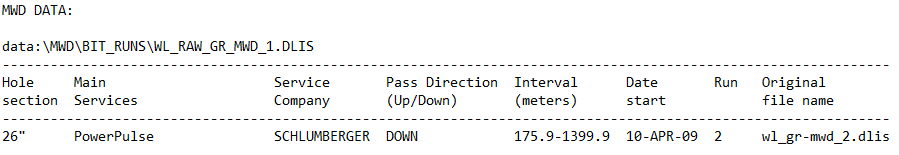

In [10]:
file = r"F:/PetroleumData/15_9-F-10/WL_RAW_GR_MWD_1.DLIS"

In [3]:
f, *f_tail = dlisio.load(file)
origin, *origin_tail = f.origins

In [4]:
f.describe()

------------
Logical File
------------
Description : logicalfile(CDF_LWD002)
Frames      : 1
Channels    : 16

Known objects
--
FILE-HEADER : 1
ORIGIN      : 1
PARAMETER   : 213
PROCESS     : 1
CHANNEL     : 16
FRAME       : 1


In [5]:
origin.describe()

------
Origin
------
name   : DLIS_DEFINING_ORIGIN
origin : 41
copy   : 0

Logical file ID          : CDF_LWD002
File set name and number : STATOILHYDRO/15_9_F_10 / 41
File number and type     : 14 / SPLICED

Field                   : Volve
Well (id/name)          :  / 15/9-F-10
Produced by (code/name) : 440 / Schlumberger
Produced for            : StatoilHydro
Order number            : 09SCA0071
Descent number          : -1
Created                 : 2009-05-07 10:53:00

Created by              : DlisBrowser, (version: ID13_0C_08)
Other programs/services : COMPOSER: IDEAL Composer


In [6]:
parameter_table = sc.summarize(f.parameters, name='Name', long_name='Long name', values='Value(s)')

# Hide parameters containing names; see the privacy note in the Introduction. Comment out these lines to show them.
mask = ~parameter_table['Name'].isin(['R8', 'RR1', 'WITN', 'ENGI'])
parameter_table = parameter_table[mask]

parameter_table.sort_values('Name')

,Name,Long name,Value(s)
163,APD,Above Permanent Datum,[54.900001525878906]
197,APIN,API Serial Number,[ ...
13,BFM1,Bore Hole Deviation From 1,[145.89999389648438]
9,BFM2,Bore Hole Deviation From 2,[207.0]
5,BFM3,Bore Hole Deviation From 3,[]
1,BFM4,Bore Hole Deviation From 4,[]
159,BLI,Bottom Log Interval,[1370.0]
15,BMN1,Bore Hole Deviation Min 1,[0.0]
11,BMN2,Bore Hole Deviation Min 2,[0.10000000149011612]
7,BMN3,Bore Hole Deviation Min 3,[]


In [7]:
for frame in f.frames:
    index_channel = next(ch for ch in frame.channels if ch.name == frame.index)
    print(f'Frame {frame.name}:')
    print(f'Description      : {frame.description}')
    print(f'Indexed by       : {frame.index_type}')
    print(f'Interval         : [{frame.index_min}, {frame.index_max}] {index_channel.units}')
    print(f'Direction        : {frame.direction}')
    print(f'Constant spacing : {frame.spacing} {index_channel.units}')
    print(f'Index channel    : {index_channel}')
    print(f'No. of channels  : {len(frame.channels)}')
    print()

Frame 60B:
Description      : 60.00 0.1 in frame data
Indexed by       : BOREHOLE-DEPTH
Interval         : [69240.0, 551160.0] 0.1 in
Direction        : INCREASING
Constant spacing : 60.0 0.1 in
Index channel    : Channel(TDEP)
No. of channels  : 16



In [8]:
channel_table = sc.summarize(f.channels, name='Name', long_name='Long name', units='Units',
                                      dimension='Dimension', frame='Frame')
channel_table

,Name,Long name,Units,Dimension,Frame
0,TDEP,6-Inch Frame Depth,0.1 in,[1],Frame(60B)
1,THKD,Total Hookload 6in,1000 kgf,[1],Frame(60B)
2,TQA,SRF STOR 6in,km.daN,[1],Frame(60B)
3,TFLO,Total Pump Flow 6in,L/min,[1],Frame(60B)
4,ROP5,5ft ROP 6in,m/h,[1],Frame(60B)
5,SWOB,Surface Weight on Bit 6in,1000 kgf,[1],Frame(60B)
6,TRPM_RT,MWD TUR_RPM 6in,c/min,[1],Frame(60B)
7,SHKRATE_RT,MWD SHKRATE 6in,BAD_UNIT-?,[1],Frame(60B)
8,SHKTOT_RT,MWD SHKTOT 6in,BAD_UNIT-?,[1],Frame(60B)
9,SHKPK_RT,MWD SHK_PK 6in,g,[1],Frame(60B)


In [18]:
file = r"F:/PetroleumData/15_9-F-10/WL_RAW_GR_MWD_1.DLIS"

In [15]:
with dlisio.load(file) as file:
    for d in file:
        print(d.describe())
        for frame in d.frames:
            print(frame.describe())
            for channel in d.channels:
                print(channel.describe())

------------
Logical File
------------
Description : logicalfile(CDF_LWD002)
Frames      : 1
Channels    : 16

Known objects
--
FILE-HEADER : 1
ORIGIN      : 1
PARAMETER   : 213
PROCESS     : 1
CHANNEL     : 16
FRAME       : 1


-----
Frame
-----
name   : 60B
origin : 41
copy   : 0

Channel indexing
--
Description      : 60.00 0.1 in frame data
Indexed by       : BOREHOLE-DEPTH
Index units      : 0.1 in
Index min        : 69240.0 [0.1 in]
Index max        : 551160.0 [0.1 in]
Direction        : INCREASING
Constant spacing : 60.0 [0.1 in]
Index channel    : Channel(TDEP)

Channels
--
TDEP       THKD       TQA        TFLO       ROP5       SWOB       TRPM_RT
SHKRATE_RT SHKTOT_RT  SHKPK_RT   SHKRSK_RT  CRPM_RT    STICK_RT   SHK3TM_RT  GRR
GRM1

-------
Channel
-------
name   : TDEP
origin : 41
copy   : 0

Description : 6-Inch Frame Depth

Physical unit of sample   : 0.1 in
Sample dimensions         : 1
Maximum sample dimensions : 1
Property indicators       : 440-CUSTOMER
Source            

In [19]:
curves_L = []
curves_name = []
longs = []
unit = []
files_L = []
files_num = []
frames = []
frames_num = []
with dlisio.load(file) as file:
    for d in file:
        files_L.append(d)
        for fram in d.frames:
            frames.append(fram)
            for channel in d.channels:
                curves_name.append(channel.name)
                longs.append(channel.long_name)
                unit.append(channel.units)
                files_num.append(len(files_L))
                frames_num.append(len(frames))
                curves = channel.curves()
                curves_L.append(curves)

In [20]:
curve_index = pd.DataFrame(
{'Curve': curves_name,
'Long': longs,
'Unit': unit,
'Internal_File': files_num,
'Frame_Number': frames_num
})

In [21]:
curve_index

,Curve,Long,Unit,Internal_File,Frame_Number
0,TDEP,6-Inch Frame Depth,0.1 in,1,1
1,THKD,Total Hookload 6in,1000 kgf,1,1
2,TQA,SRF STOR 6in,km.daN,1,1
3,TFLO,Total Pump Flow 6in,L/min,1,1
4,ROP5,5ft ROP 6in,m/h,1,1
5,SWOB,Surface Weight on Bit 6in,1000 kgf,1,1
6,TRPM_RT,MWD TUR_RPM 6in,c/min,1,1
7,SHKRATE_RT,MWD SHKRATE 6in,BAD_UNIT-?,1,1
8,SHKTOT_RT,MWD SHKTOT 6in,BAD_UNIT-?,1,1
9,SHKPK_RT,MWD SHK_PK 6in,g,1,1


In [22]:
curve_df = pd.DataFrame()
name_index = 0
for c in curves_L:
    name = curves_name[name_index]
    np.vstack(c)
    try:
        num_col = c.shape[1]
        col_name = [name] * num_col
        df = pd.DataFrame(data=c, columns=col_name)
        name_index = name_index + 1
        df = sc.df_column_uniquify(df)
        curve_df = pd.concat([curve_df, df], axis=1)
    except:
        num_col = 0
        df = pd.DataFrame(data=c, columns=[name])
        name_index = name_index + 1
        curve_df = pd.concat([curve_df, df], axis=1)
        continue

In [23]:
curve_df

,TDEP,THKD,TQA,TFLO,ROP5,SWOB,TRPM_RT,SHKRATE_RT,SHKTOT_RT,SHKPK_RT,SHKRSK_RT,CRPM_RT,STICK_RT,SHK3TM_RT,GRR,GRM1
0,69240.0,98.761276,0.196485,0.000000,6.111278,7.575082,-999.250000,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
1,69300.0,98.761276,0.123361,0.000000,6.068187,7.649119,-999.250000,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
2,69360.0,98.761276,0.105171,-999.250000,6.033207,7.605937,-999.250000,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
3,69420.0,98.761276,0.120243,0.000000,5.907642,7.589340,-999.250000,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
4,69480.0,98.761276,0.137091,0.000000,5.863863,7.593056,-999.250000,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,550920.0,109.123779,0.552378,3472.359375,20.393169,16.602535,3125.000000,0.00,-999.25,0.00,0.00,-999.25,-999.25,0.00,-999.25,-999.25
8029,550980.0,109.123779,0.553567,3472.359375,17.694496,11.888947,3138.020752,0.00,-999.25,0.00,0.00,-999.25,-999.25,0.00,-999.25,-999.25
8030,551040.0,109.123779,0.554712,3472.359375,17.552094,14.150726,3125.000000,0.00,-999.25,0.00,0.00,-999.25,-999.25,0.00,-999.25,-999.25
8031,551100.0,109.123779,0.541228,3472.359375,17.450903,16.049181,3085.937500,0.00,-999.25,0.00,0.00,-999.25,-999.25,0.00,-999.25,-999.25


In [28]:
curve_df.columns

Index(['TDEP', 'THKD', 'TQA', 'TFLO', 'ROP5', 'SWOB', 'TRPM_RT', 'SHKRATE_RT',
       'SHKTOT_RT', 'SHKPK_RT', 'SHKRSK_RT', 'CRPM_RT', 'STICK_RT',
       'SHK3TM_RT', 'GRR', 'GRM1'],
      dtype='object')

In [29]:
curve_df["Depth"] = curve_df["TDEP"]*0.00254       #in -> mts
curve_df = curve_df.replace(-999.25,np.nan)

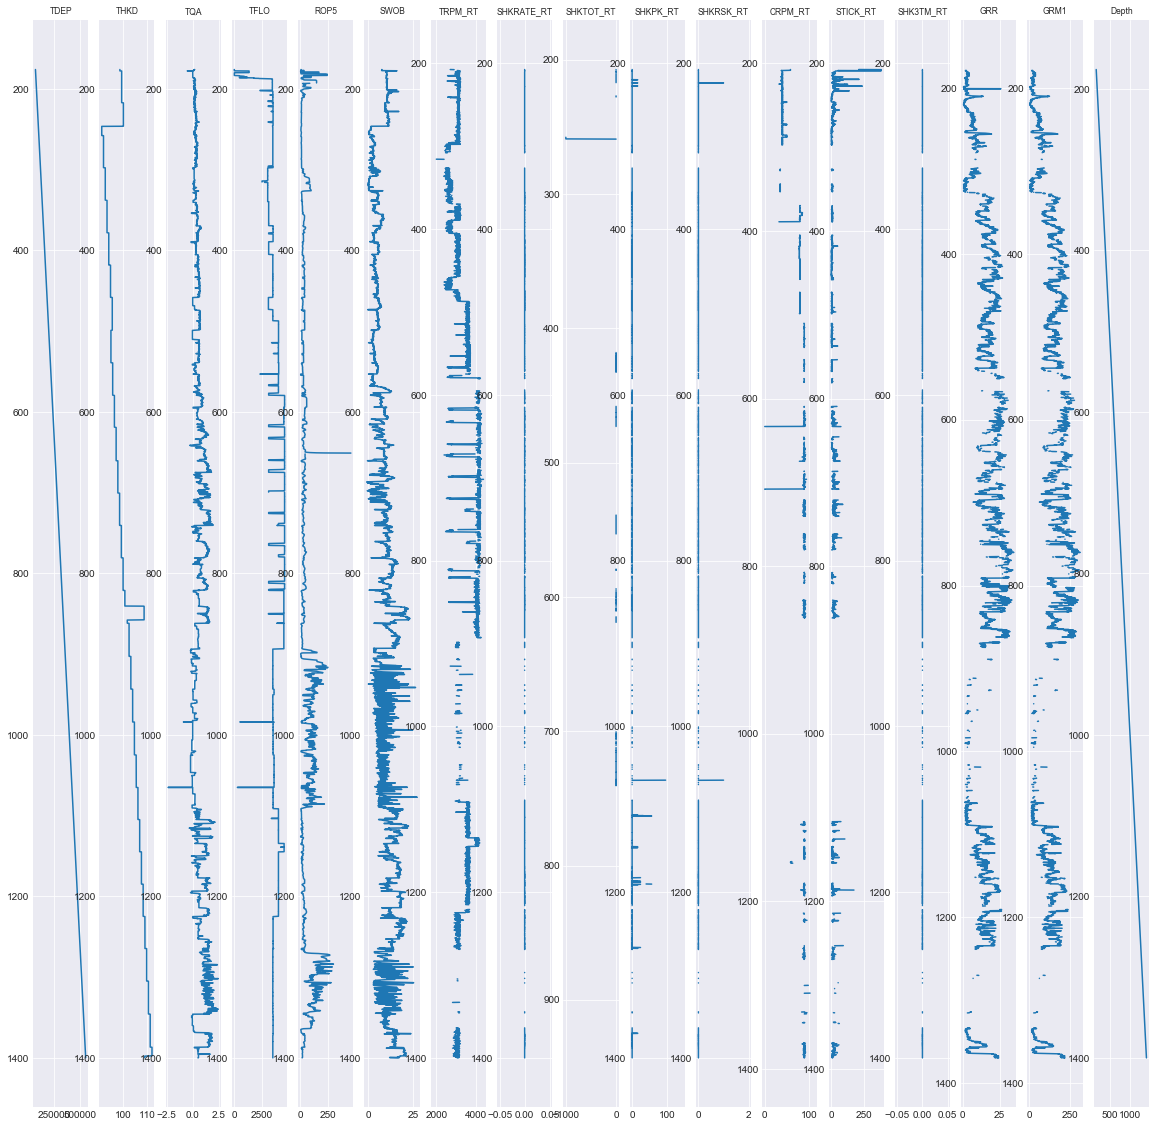

In [32]:
sc.well_plt(curve_df)

In [36]:
print('26" depth section\nInitial:',curve_df["Depth"].min(),"Final:",curve_df["Depth"].max())
print("rows on df:",len(curve_df))

26" depth section
Initial: 175.86959838867188 Final: 1399.9464111328125
rows on df: 8033


# 8 1/2" Section 
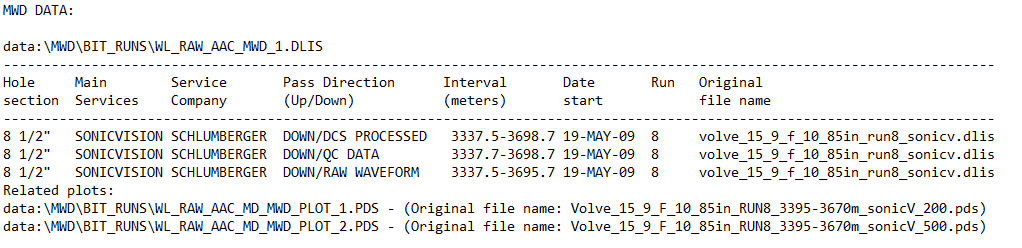

In [72]:
del curve_df

In [87]:
file = r"F:/PetroleumData/15_9-F-10/WL_RAW_AAC_MWD_1.DLIS"

In [74]:
f, *f_tail = dlisio.load(file)
origin, *origin_tail = f.origins

In [75]:
channel_table = sc.summarize(f.channels, name='Name', long_name='Long name', units='Units',
                                      dimension='Dimension', frame='Frame')
channel_table

,Name,Long name,Units,Dimension,Frame
0,VPVS,Compressional to Shear Velocity Ratio,,[1],Frame(B63262)
1,DTSM,Delta-T Shear,us/ft,[1],Frame(B63262)
2,DTCO,Delta-T Compressional,us/ft,[1],Frame(B63262)
3,TDEP,None,0.1 in,[1],Frame(B63262)


In [88]:
with dlisio.load(file) as file:
    for d in file:
        print(d.describe())
        for frame in d.frames:
            print(frame.describe())
            for channel in d.channels:
                print(channel.describe())

------------
Logical File
------------
Description : logicalfile(DCS Processed Result)
Frames      : 1
Channels    : 4

Known objects
--
FILE-HEADER : 1
ORIGIN      : 3
PROCESS     : 1
PARAMETER   : 562
TOOL        : 1
CHANNEL     : 4
FRAME       : 1


-----
Frame
-----
name   : B63262
origin : 1
copy   : 0

Channel indexing
--
Indexed by       : BOREHOLE-DEPTH
Index units      : 0.1 in
Index min        : 1314000.0 [0.1 in]
Index max        : 1456200.0 [0.1 in]
Direction        : DECREASING
Constant spacing : -60.0 [0.1 in]
Index channel    : Channel(TDEP)

Channels
--
TDEP VPVS DTSM DTCO

-------
Channel
-------
name   : VPVS
origin : 1
copy   : 0

Description : Compressional to Shear Velocity Ratio

Sample dimensions         : 1
Maximum sample dimensions : 1
Property indicators       : 440-ISONIC 440-BDT    440-BASIC  440-RESULT
Source                    : Process(BDT)


-------
Channel
-------
name   : DTSM
origin : 1
copy   : 0

Description : Delta-T Shear

Physical unit of sample 

In [77]:
curves_L = []
curves_name = []
longs = []
unit = []
files_L = []
files_num = []
frames = []
frames_num = []
with dlisio.load(file) as file:
    for d in file:
        files_L.append(d)
        for fram in d.frames:
            frames.append(fram)
            for channel in d.channels:
                curves_name.append(channel.name)
                longs.append(channel.long_name)
                unit.append(channel.units)
                files_num.append(len(files_L))
                frames_num.append(len(frames))
                curves = channel.curves()
                curves_L.append(curves)

In [78]:
curve_index = pd.DataFrame(
{'Curve': curves_name,
'Long': longs,
'Unit': unit,
'Internal_File': files_num,
'Frame_Number': frames_num
})

In [84]:
len(curves_name)

18

In [79]:
curve_df = pd.DataFrame()
name_index = 0
for c in curves_L:
    name = curves_name[name_index]
    np.vstack(c)
    try:
        num_col = c.shape[1]
        col_name = [name] * num_col
        df = pd.DataFrame(data=c, columns=col_name)
        name_index = name_index + 1
        df = sc.df_column_uniquify(df)
        curve_df = pd.concat([curve_df, df], axis=1)
    except:
        num_col = 0
        df = pd.DataFrame(data=c, columns=[name])
        name_index = name_index + 1
        curve_df = pd.concat([curve_df, df], axis=1)
        continue

In [108]:
curve_df

,VPVS,DTSM,DTCO,TDEP_1,DTTS,CHTP,DTTP,SPT4,SPT4_1,SPT4_2,...,WF1T_142,WF1T_143,WF1T_144,WF1T_145,WF1T_146,WF1T_147,WF1T_148,WF1T_149,WF1T_150,TDEP_3
0,-999.25,-999.25,-999.25,1456200.0,-999.25,-999.25,-999.25,0.432025,0.476523,0.535913,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1314000.0
1,-999.25,-999.25,-999.25,1456140.0,-999.25,-999.25,-999.25,0.432025,0.476523,0.535913,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1314020.0
2,-999.25,-999.25,-999.25,1456080.0,-999.25,-999.25,-999.25,0.432025,0.476523,0.535913,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1314040.0
3,-999.25,-999.25,-999.25,1456020.0,-999.25,-999.25,-999.25,0.432025,0.476523,0.535913,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1314060.0
4,-999.25,-999.25,-999.25,1455960.0,-999.25,-999.25,-999.25,0.432025,0.476523,0.535913,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1314080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.503697,21.163748,16.173634,1.804935,30.082249,67.278069,48.945587,-11.077347,-52.413895,1454920.0
7047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.503697,21.163748,16.173634,1.804935,30.082249,67.278069,48.945587,-11.077347,-52.413895,1454940.0
7048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.503697,21.163748,16.173634,1.804935,30.082249,67.278069,48.945587,-11.077347,-52.413895,1454960.0
7049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.503697,21.163748,16.173634,1.804935,30.082249,67.278069,48.945587,-11.077347,-52.413895,1454980.0


In [97]:
curve_df["TDEP"]

,TDEP,TDEP,TDEP
0,1456200.0,1456200.0,1314000.0
1,1456140.0,1456140.0,1314020.0
2,1456080.0,1456080.0,1314040.0
3,1456020.0,1456020.0,1314060.0
4,1455960.0,1455960.0,1314080.0
...,...,...,...
7046,NaN,NaN,1454920.0
7047,NaN,NaN,1454940.0
7048,NaN,NaN,1454960.0
7049,NaN,NaN,1454980.0


In [101]:
cols = []
count = 1
for column in curve_df.columns:
    if column == "TDEP":
        cols.append(f'TDEP_{count}')
        count+=1
        continue
    cols.append(column)

In [105]:
curve_df.columns = cols

In [75]:
channel_table = sc.summarize(f.channels, name='Name', long_name='Long name', units='Units',
                                      dimension='Dimension', frame='Frame')
channel_table

,Name,Long name,Units,Dimension,Frame
0,VPVS,Compressional to Shear Velocity Ratio,,[1],Frame(B63262)
1,DTSM,Delta-T Shear,us/ft,[1],Frame(B63262)
2,DTCO,Delta-T Compressional,us/ft,[1],Frame(B63262)
3,TDEP,None,0.1 in,[1],Frame(B63262)


In [111]:
curve_df = curve_df[['TDEP_3','VPVS','DTSM','DTCO']]
curve_df["Depth"] = curve_df["TDEP_3"]*0.00254       #in -> mts
curve_df = curve_df.replace(-999.25,np.nan)

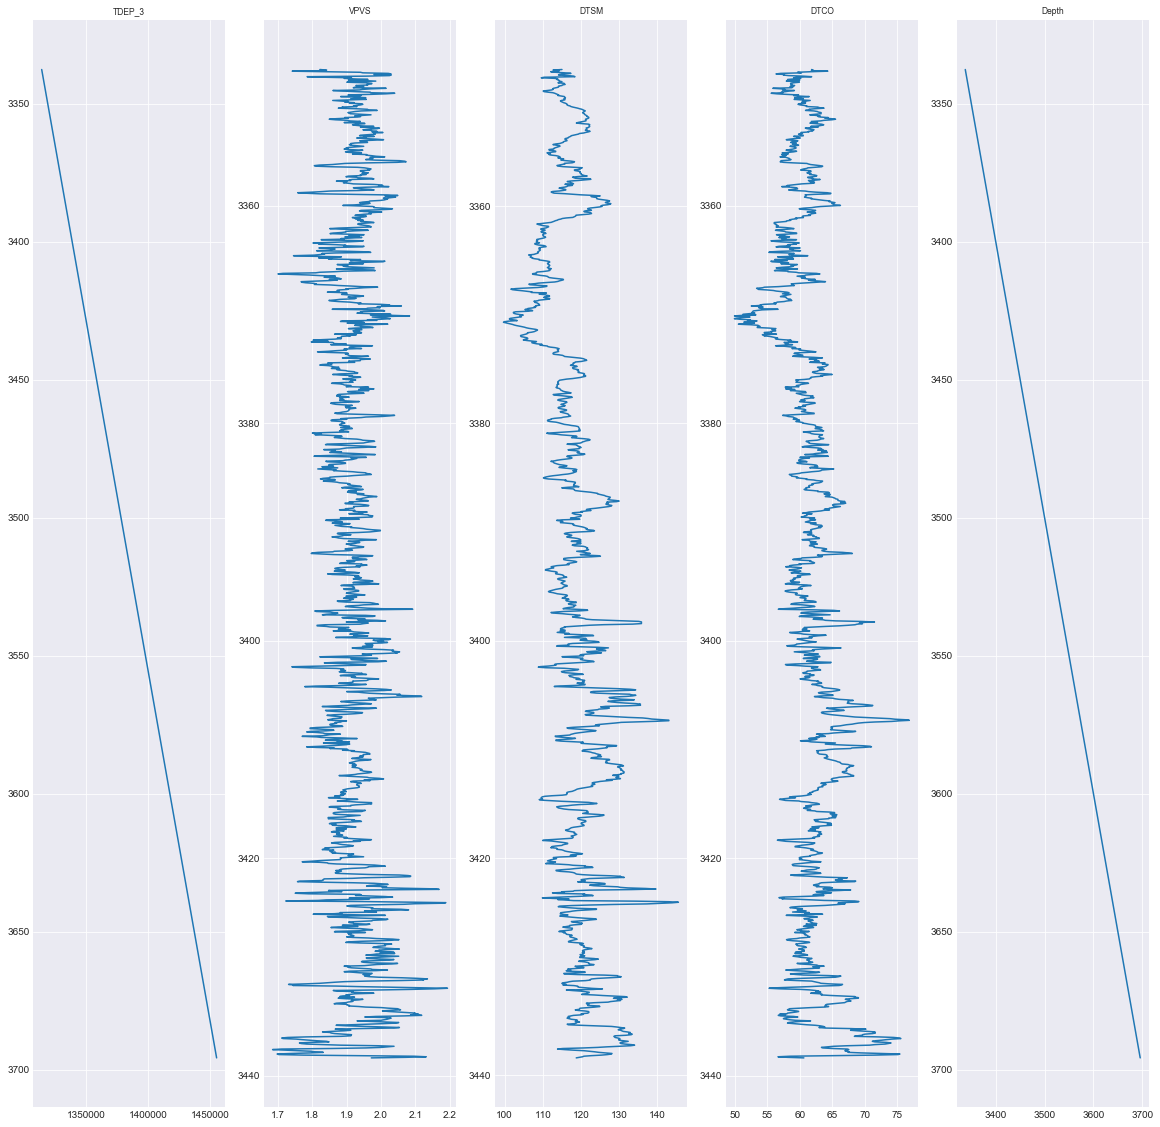

In [112]:
sc.well_plt(curve_df)